# <span style="color: blue; font-family: Arial, sans-serif;">Quantum Inspired Genetic Algorithm for Antenna Positioning Problem</span>

## <span style="color: green; font-family: Georgia, serif;">Prepared by:</span>
- <span style="color: grey; font-family: Courier New, monospace;">BEN EL GHALI Amir Loris</span>
- <span style="color: grey; font-family: Courier New, monospace;">FATNASSI Rayan</span>

## <span style="color: green; font-family: Georgia, serif;">Supervised by:</span>
<span style="color: grey; font-family: Courier New, monospace;">Mr. Hachaichi Yassine</span>


# <span style="color:red"> **Introduction**</span>

This project aims to determine the optimal positioning of antennas for exemple for  Orange or Telecom or Ooredoo within Tunisia. By leveraging both a **standard Genetic Algorithm** (SGA) and a **Quantum Inspired Genetic Algorithm** (QGA), we strive to maximize the coverage area while minimizing the number of antennas required. 

The project begins with the importation and preprocessing of the Tunisian dataset, including **geographic information** and the positions of existing antennas. 
The dataset provides the necessary spatial data to analyze and determine optimal locations for additional antennas. 

We first implement the **standard Genetic Algorithm** to find feasible solutions, evaluating the **fitness** based on **coverage and efficiency**, and applying **selection**, **crossover**, and **mutation** operations to evolve the population. 

Next, we introduce quantum computing principles with the Quantum Inspired Genetic Algorithm, implementing quantum-specific operations such as **quantum rotation** gates and **quantum measurement**. 

The primary objective is to utilize these advanced optimization techniques to identify the best positions for new antennas, improving network coverage and service quality for customers. This project was prepared by BEN EL GHALI Amir Loris and FATNASSI Rayan, and supervised by Mr. Hachaichi Yassine.


## <span style="color:red"> **0. Libraries Overview**</span>


 **numpy (np)** Perform numerical operations and manipulate arrays for the Genetic Algorithm (GA).

 **matplotlib.pyplot (plt)** Visualize antenna distribution and algorithm performance.

 **random** Initialize populations, perform selection, crossover, and mutation in GA.

 **pandas (pd)** Import, process, and analyze the Tunisian dataset.

 **matplotlib.image (mpimg)** Display maps and other relevant images.

 **geopandas (gpd)** Manipulate geographical data and perform spatial analysis.

 **shapely.geometry.Point** Represent antenna locations as geometric points.

 **geopy.distance.geodesic** Compute distances between antennas and other points.

 **math** Perform various calculations required in GA.

 **openpyxl** Manage data import/export to Excel.

 **warnings** Control warning displays to avoid interruptions.


In [151]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import matplotlib.image as mpimg
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import math
import openpyxl

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# <span style="color:red">**1. Analyzing actualized data of Tunisian antennas**</span>


Our data set contains 14 rows, which we will detail in the following lines : 
* **Radio :** The generation of the broadland cellular network technology.
* **MCC :** Mobile Country Code (605 for Tunisia).
* **MNC :** Mobile Network Code. It is an unique identifier used in combination with the Mobile Country Code (MCC) to identify a specific mobile network operator within a country.
* **LAC :** Location Area Code. It is an unique identifier used to define a certain area in a nation served by one or multiple base stations.
* **CID :** It is a unique number used to identify each cell within a mobile network.
* **Longitude :** The longitude coordinate of the given cell.
* **Latitude :** The latitude coordinate of the given cell.
* **Range :** Approximate area within which the cell could be (In meters).
* **Samples :** Number of measures processed to get a particular data point.
* **Changeable :** It indicates how the location of the antenna cell is found. In our case, the value is 1, which means that the antenna cell is directly obtained rom the telecom firm.
* **Created :** It indicates when was the antenna cell firstly  put operational (UNIX timestamp)
* **Updated :** It indeicates when was the antenna cell information lastly updated
* **AverageSignal :** It is a measure given by the OpenCellID precesses. In ou case it is 0, indicating that a process from OpenCellID didn't occure.

Note that various informations are useless to our project, so we will process the data to obtain the useful data.
Note also that there is a feature which doesn't have a label. This feature isn't identified in the OpenCellID web site, and isn't also relevant to our project, so we will drop it.

##  <span style="color: rgb(50,134,14) "> **1.1 Importing the  data** </span>


In [152]:
antenna_cells = pd.read_csv('605.csv', header=None)
antenna_cells_columns_name = ['Radio','MCC','MNC','LAC','CID',' ','Longitude','Latitude','Range','Samples','Changeable','Created','Updated','AverageSignal']
antenna_cells.columns = antenna_cells_columns_name

In [153]:
antenna_cells.head(5)

,Radio,MCC,MNC,LAC,CID,,Longitude,Latitude,Range,Samples,Changeable,Created,Updated,AverageSignal
0,GSM,605,1,10006,854,0,10.184097,36.807175,1000,3,1,1459703153,1481914323,0
1,GSM,605,3,1205,24201,0,10.653133,36.419420,1000,16,1,1459811778,1460985891,0
2,GSM,605,1,10017,474,0,10.139694,36.830978,1000,1,1,1459681082,1459681082,0
3,GSM,605,3,414,55783,0,10.158920,36.855698,1000,1,1,1459697022,1459697022,0
4,GSM,605,2,414,56195,0,10.158920,36.855698,1000,2,1,1459718723,1487174360,0


In [154]:
antenna_cells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73596 entries, 0 to 73595
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Radio          73596 non-null  object 
 1   MCC            73596 non-null  int64  
 2   MNC            73596 non-null  int64  
 3   LAC            73596 non-null  int64  
 4   CID            73596 non-null  int64  
 5                  73596 non-null  int64  
 6   Longitude      73596 non-null  float64
 7   Latitude       73596 non-null  float64
 8   Range          73596 non-null  int64  
 9   Samples        73596 non-null  int64  
 10  Changeable     73596 non-null  int64  
 11  Created        73596 non-null  int64  
 12  Updated        73596 non-null  int64  
 13  AverageSignal  73596 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 7.9+ MB


##  <span style="color: rgb(50,134,14) "> **1.2 Data cleaning** </span>



On a first step, we are selecting the columns that we will be working on. For our research (optimal position for the antennas), we will be using only the columns that identify the **antenna cell's locations**, **their ID**, and their **corresponding ranges**.
So we will drop the following columns : 
* Radio since we do not need to know which technology is used for the antenna cell
* MCC since it is equal for all the antenna cells
* Samples and changeable since we don't need to know how the antenna cell was discovered
* Changeable since it is constant and irrilevant
* Created and Updated since we don't need to know when was the antenna cell's informations created and updated
* AverageSignal since it is a constant and irrelevant measure

**<span style="color: rgb(200,0,0)">Note that we will keep the MNC feature for futur filter of the data, since we can working with different telecommunication operator.</span>**

In [155]:
antenna_cells_dropped = antenna_cells.drop(['Radio','MCC','Samples','Changeable','Created','Updated','AverageSignal',' '], axis=1)
antenna_cells_dropped = antenna_cells_dropped.rename(columns={'Longitude': 'lng', 'Latitude': 'lat'})

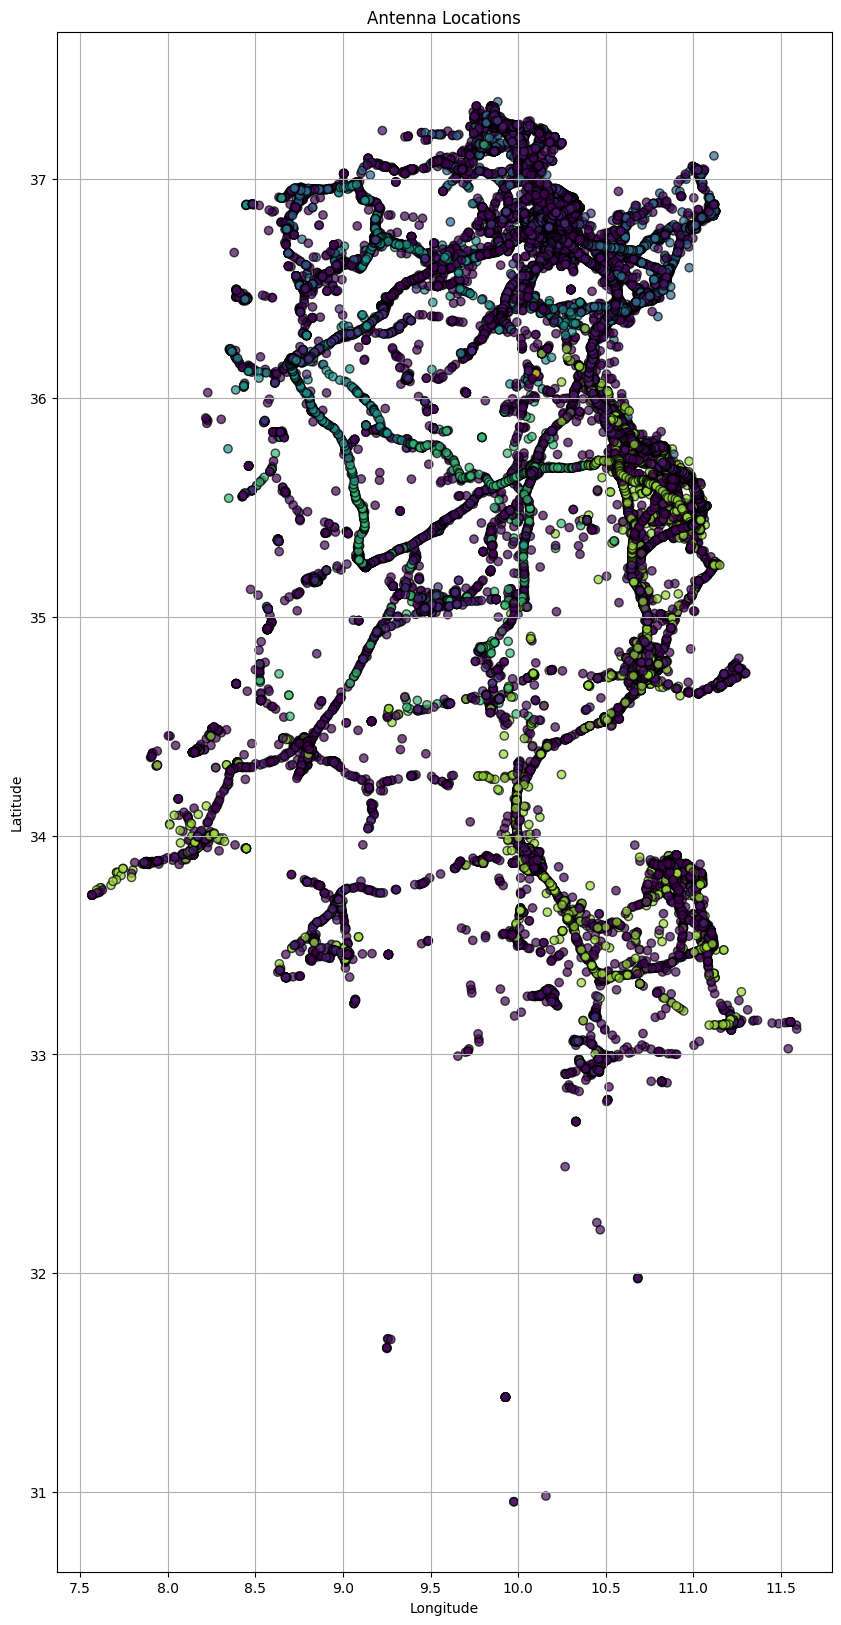

In [156]:
antenna_cells_dropped.head()
#len(antenna_cells_dropped)

# Creating a scatter plot
plt.figure(figsize=(10, 20))
plt.scatter(antenna_cells_dropped['lng'], antenna_cells_dropped['lat'], c=antenna_cells_dropped['LAC'], marker='o', edgecolor='k', alpha=0.7)
plt.title('Antenna Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

##  <span style="color: rgb(50,134,14) "> **1.3 Data reduction** </span>


###  <span style="color: rgb(78,79,209) "> **1.3.1 Data Aggregation and Distance Calculation** </span>

In order to slightly reduce our data,<span style="color: blue"> **we will group the different antenna cells that are inside the same local area (possess the same LAC)** </span>, and **summarize** them by the **average range, longitude, and latitude**. We will also assign them a random CID from the list of antenna cells of the same local area. This operation will be performed using the aggregation function.

###  <span style="color: rgb(78,79,209) "> **1.3.2 Theoretical Aspect** </span>

The aggregation function helps in data reduction by <span style="color: blue"> **combining multiple entries that share a common attribute** </span>, such as the Local Area Code (LAC) in our case. By averaging the range, longitude, and latitude of antennas within the same local area, we obtain a single representative point that simplifies the dataset without significant loss of information. This process <span style="color: blue">**reduces the complexity** </span>of the dataset and makes it more manageable .

###  <span style="color: rgb(78,79,209) "> **1.3.3 Distance Calculation** </span>

The function `distance` calculates the distance between two points on the Earth's surface given their latitude and longitude coordinates. This is done using the Haversine formula, which is a well-known method for calculating the shortest distance over the earth's surface, providing great-circle distances between two points.

###  <span style="color: rgb(78,79,209) "> **1.3.4 How the Code Works** </span>

The `distance` function uses the following steps to calculate the distance between two geographical points:

1. **Inputs**: It takes the latitude and longitude of two points (lat1, lon1) and (lat2, lon2) as inputs.
2. **Radius of the Earth**: The Earth's radius (R) is set to 6371 kilometers.
3. **Latitude and Longitude Differences**: The differences between the latitudes and longitudes of the two points are converted from degrees to radians.
4. **Haversine Formula**:
    - Calculate the square of half the chord length between the points using the differences in latitude and longitude.
    - Compute the angular distance in radians.
5. **Distance Calculation**: The distance is then derived by multiplying the angular distance by the Earth's radius.

Here is the code for the distance calculation function:




In [157]:
def distance(lat1, lon1, lat2, lon2):
    """
    This function calculates the distance between two points on the Earth's surface, given their latitude and longitude coordinates
    using the Haversine formula.
    """
    R = 6371  # radius of the earth in m
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return distance

In [158]:
def aggregate (df) :

    aggregated_data = []

    unique_pairs = df[['MNC', 'LAC']].drop_duplicates()

    for _, row in unique_pairs.iterrows():
        mnc = row['MNC']
        lac = row['LAC']

        local_df = df[(df['MNC'] == mnc) & (df['LAC'] == lac)]

        # defining average longitude and latitude
        longx = local_df.lng.mean()
        latx = local_df.lat.mean()

        # Defining the average range = average range + average points distance
        distances = local_df.apply(lambda x: distance(x['lat'], x['lng'],latx, longx), axis=1)
        new_range = 0.5*(distances + local_df['Range']/1000).max() + 0.5*(distances + local_df['Range']/1000).min()

        new_cid = local_df['CID'].iloc[0]

        aggregated_row = {
            'MNC': mnc,
            'LAC': lac,
            'CID': new_cid,
            'lng': longx,
            'lat': latx,
            'Range': new_range,
        }

        aggregated_data.append(aggregated_row)
    aggregated_df = pd.DataFrame(aggregated_data)
    return aggregated_df


##  <span style="color: rgb(50,134,14) "> **1.4 Results** </span>



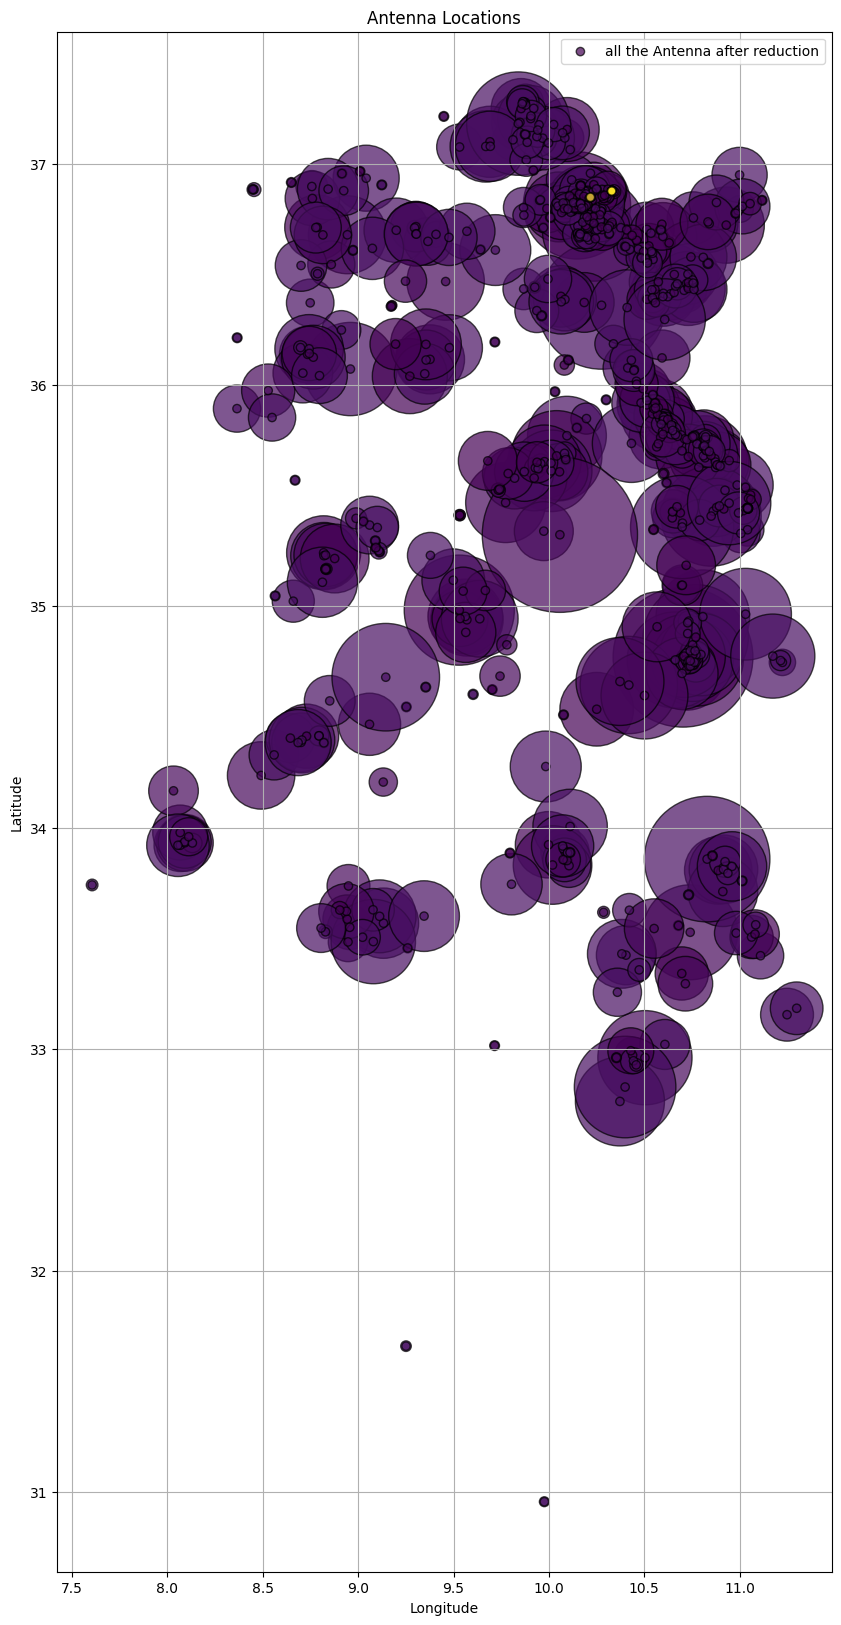

In [159]:
antenna_cells_first_red = aggregate(antenna_cells_dropped)
# Creating a scatter plot
plt.figure(figsize=(10, 20))
plt.scatter(antenna_cells_first_red['lng'], antenna_cells_first_red['lat'], c=antenna_cells_first_red['MNC'], s=antenna_cells_first_red['Range']*50, marker='o', edgecolor='k', alpha=0.7)
plt.scatter(antenna_cells_first_red['lng'], antenna_cells_first_red['lat'], c=antenna_cells_first_red['MNC'], marker='o', edgecolor='k', alpha=0.7,label='all the Antenna after reduction')
plt.title('Antenna Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

In [160]:
print(f"The original size of the data is : {len(antenna_cells_dropped)}")
print(f"The new size of the data becomes : {len(antenna_cells_first_red)}")
antenna_cells_first_red.head()

The original size of the data is : 73596
The new size of the data becomes : 711


,MNC,LAC,CID,lng,lat,Range
0,1,10006,854,10.181554,36.813068,4.438893
1,3,1205,24201,10.638099,36.411162,28.238875
2,1,10017,474,10.147151,36.810919,119.467415
3,3,414,55783,10.276108,36.359711,169.495487
4,2,414,56195,10.171761,36.850568,13.578288


The data size has reduced enormously, which is convenient for our Genetic Algorithms. However, a population of 711 individuals is still enormous for our GA. So we will try to filter the data based on the MNC, so we obtain the 4 data sets of the network operators each by themselves. 

In [161]:
# List of telecom providers and their corresponding MNC codes
telecom_providers = {
    'ooridoo': 1,
    'telecom': 2,
    'orange': 3,
    'lycamobile': 54
}

# Dictionary to store the filtered DataFrames
antenna_cells_dict = {}

# Filter the DataFrame for each telecom provider and store in the dictionary
for provider, mnc in telecom_providers.items():
    antenna_cells_dict[provider] = antenna_cells_first_red[antenna_cells_first_red['MNC'] == mnc].drop('MNC',axis=1)


In [162]:
for tp in telecom_providers.keys():
    print(f"The {tp} antenna sites dataset contain {len(antenna_cells_dict[tp])} rows")

The ooridoo antenna sites dataset contain 118 rows
The telecom antenna sites dataset contain 187 rows
The orange antenna sites dataset contain 402 rows
The lycamobile antenna sites dataset contain 4 rows


In [163]:
antenna_cells_dict['orange'].head()

,LAC,CID,lng,lat,Range
1,1205,24201,10.638099,36.411162,28.238875
3,414,55783,10.276108,36.359711,169.495487
7,1204,24583,10.721991,36.457612,26.905953
8,1416,45088,9.132751,33.569024,51.262533
9,2131,98249,10.217972,36.955948,1.000000


Now, after executing the aggregation function, we have a smaller dataset that is representative of the original. This reduction in data size allows us to efficiently apply the <span style="color: blue">**Simple Genetic Algorithm (SGA)** </span> and the <span style="color: blue"> **Quantum Genetic Algorithm (QGA)** </span>to find the optimal positions for the antennae. 

Before proceeding with these algorithms, we need to import and analyze the cities dataset to understand the geographical distribution of the cities and how they interact with the potential antenna positions. This step is crucial for ensuring that our algorithms can effectively optimize the antenna placement to maximize coverage and minimize interference.



# <span style="color:red">**2. Analyzing the cities data**</span>


##  <span style="color: rgb(50,134,14) "> **2.1 Importing the cities data** </span>

In [164]:
cities = pd.read_csv('./tn.csv')
cities.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Tunis,36.8064,10.1817,Tunisia,TN,Tunis,primary,602560,602560
1,Sidi Bouzid,35.0381,9.4858,Tunisia,TN,Sidi Bouzid,admin,429912,429912
2,Sfax,34.7400,10.7600,Tunisia,TN,Sfax,admin,265131,265131
3,Sousse,35.8333,10.6333,Tunisia,TN,Sousse,admin,221530,221530
4,Kairouan,35.6772,10.1008,Tunisia,TN,Kairouan,admin,186653,186653


In [165]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               79 non-null     object 
 1   lat                79 non-null     float64
 2   lng                79 non-null     float64
 3   country            79 non-null     object 
 4   iso2               79 non-null     object 
 5   admin_name         79 non-null     object 
 6   capital            24 non-null     object 
 7   population         79 non-null     int64  
 8   population_proper  79 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.7+ KB


As we can see, there are various irrelevant featues in this data. We are going to conserve only the city name, the respective latitude and longitude.

In [166]:
cities_dropped = cities.drop(['country','iso2','admin_name','capital','population','population_proper'], axis=1)

In [167]:
cities_dropped.head()

,city,lat,lng
0,Tunis,36.8064,10.1817
1,Sidi Bouzid,35.0381,9.4858
2,Sfax,34.7400,10.7600
3,Sousse,35.8333,10.6333
4,Kairouan,35.6772,10.1008


Now that the data is ready, we can start using the Quantum inspired Genetic algorithms. In order to do that, we will, at first, use the standard genetic algorithm as a reference to our results.

# <span style="color:red">**3. Standard Genetic Algorithm**</span>


##  <span style="color: rgb(50,134,14) "> **3.1  Preparing the Data for Genetic Algorithms** </span>

In this section, we prepare the necessary data structures to be used by the genetic algorithms for the antenna positioning problem.

First, we extract the relevant information from our datasets:



In [168]:
cities = cities_dropped.values
potential_sites = antenna_cells_dict['orange'][['LAC','lng','lat','Range']].values
pd.DataFrame(potential_sites)
pd.DataFrame(cities)


,0,1,2
0,Tunis,36.8064,10.1817
1,Sidi Bouzid,35.0381,9.4858
2,Sfax,34.74,10.76
3,Sousse,35.8333,10.6333
4,Kairouan,35.6772,10.1008
...,...,...,...
74,Rhennouch,33.93,10.07
75,Dahmani,35.95,8.8333
76,El Alia,37.1667,10.0333
77,Ar Rudayyif,34.3833,8.15


###  <span style="color: rgb(78,79,209) "> **3.1.1 Understanding the `sets` and `universe` Lists** </span>

In the context of our antenna positioning problem, we need to determine which cities can be covered by each potential antenna site. To achieve this, we create two essential lists: `sets` and `universe`.

The `sets` list contains sublists of cities that are within the coverage range of each potential antenna site.



In [169]:
#we create two lists universe and sets in order to be used by the genetic algorithm
sets=[]
for p_city in potential_sites:
    tmp_set = []
    for city in cities:
        if distance(city[1],city[2],p_city[2],p_city[1])<p_city[3]:# the coverage range
            tmp_set.append(city[0])
    tmp_set=list(set(tmp_set))
    #we sort our list tmp_set to prevent any matching issue later in the code
    sets.append(sorted(tmp_set))

universe=[city[0] for city in cities]
pd.DataFrame(sets)

#set(pd.DataFrame(sets).iloc[3])

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,Beni Khiar,Dar Chabanne,Hammamet,Korba,Nabeul,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Akouda,Ariana,Aïne Draham,Ben Arous,Beni Khiar,Bizerte,Bou Salem,Béja,Dahmani,Dar Chabanne,...,Sidi Bouzid,Siliana,Soliman,Sousse,Sukrah,Tabarka,Teboulba,Tebourba,Tunis,Zaghouan
2,Beni Khiar,Dar Chabanne,Hammamet,Korba,Nabeul,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Douz,Kebili,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
398,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
399,Kalaa Srira,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
400,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


now let's visualize the antennas and cities together 

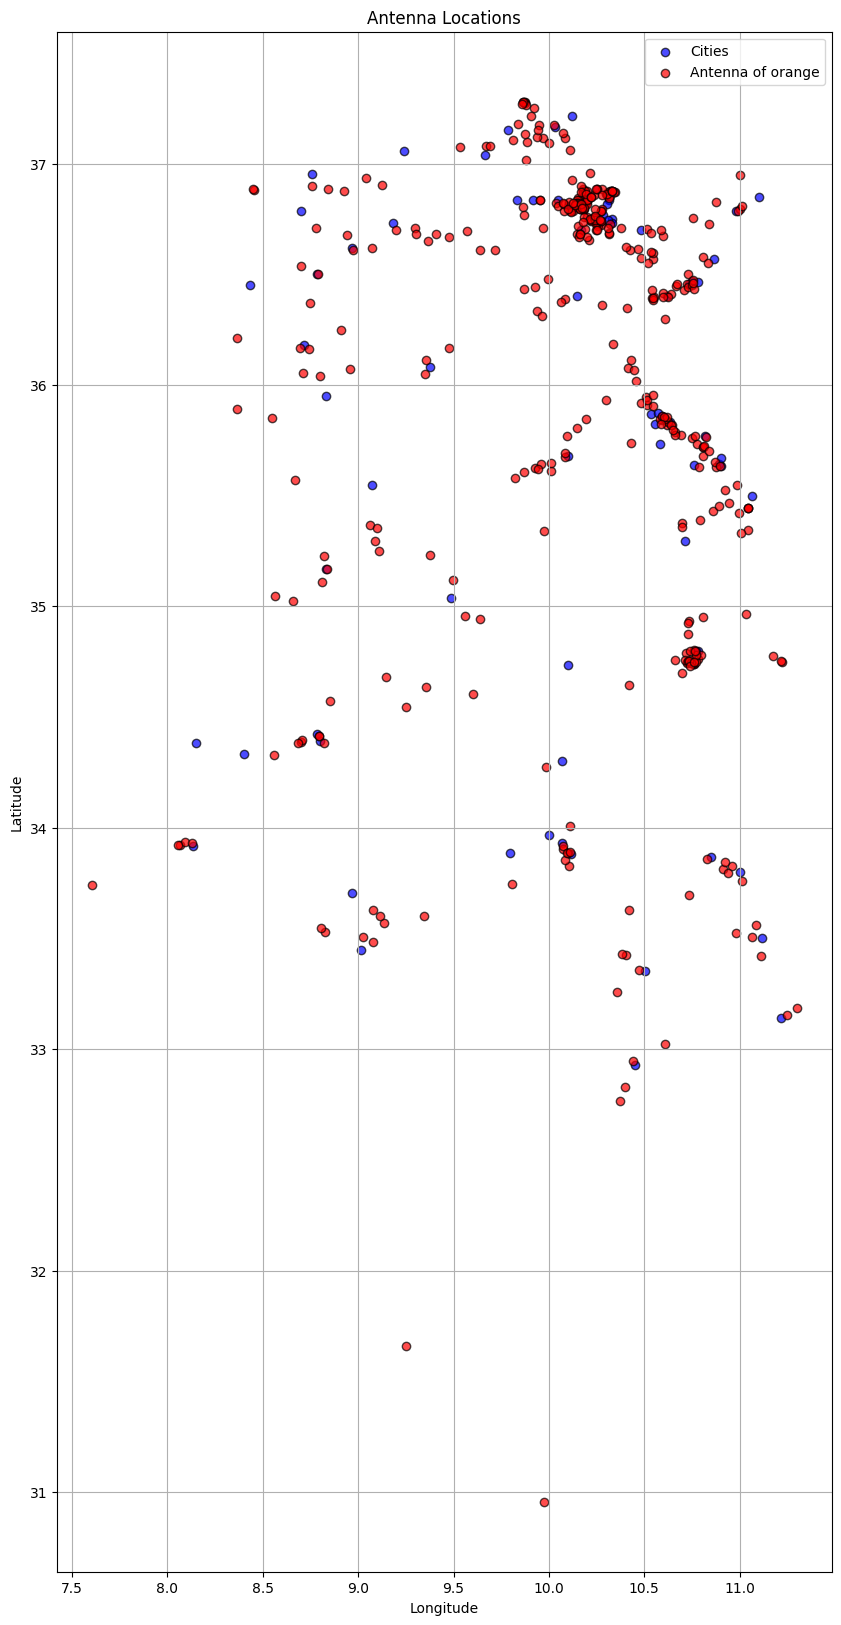

In [170]:
# Extracting 'lng' and 'lat' columns
longitudes = cities_dropped['lng']
latitudes = cities_dropped['lat']

# Extracting 'lng' and 'lat' columns
longitudes_ant = antenna_cells_dict['orange']['lng']
latitudes_ant = antenna_cells_dict['orange']['lat']

# Creating a scatter plot
plt.figure(figsize=(10, 20))
plt.scatter(longitudes, latitudes, c='blue', marker='o', edgecolor='k', alpha=0.7,label = 'Cities')
plt.scatter(longitudes_ant, latitudes_ant, c='red', marker='o', edgecolor='k', alpha=0.7, label = 'Antenna of orange')
plt.title('Antenna Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

##  <span style="color: rgb(50,134,14) "> **3.2 SGA** </span>


###  <span style="color: rgb(78,79,209) "> **3.2.1 Globale variable:** </span>

- **MUTATION_RATE**: Probability of genetic mutation during evolution.
- **CROSSOVER_RATE**: Likelihood of genetic crossover between individuals.
- **GENERATIONS**: Total number of iterations or generations.
- **POP_SIZE**: Size of the population of candidate solutions.
- **SETS**: List of coverage relationships between cities and antenna sites.
- **UNIVERSE**: List of all cities requiring antenna coverage.

In [171]:
#global variables
MUTAUTION_RATE = 0.1
CROSSOVER_RATE = 0.9
GENERATIONS = 100 
POP_SIZE = 110
SETS = sets
UNIVERSE = universe

###  <span style="color: rgb(78,79,209) "> **3.2.2 Preparing the Functions** </span> 

#### 3.2.2.1 `Repairing` function 
The "`repairing`" function ensures that a ***given solution*** covers all ***required cities*** by selecting appropriate ***antenna sites***. It iterates through ***each set of cities*** covered by ***antenna sites***, adding them to a ***set called "covered."*** It then identifies any cities that remain uncovered and a***ssigns antenna sites to cover them until all cities are accounted for***. Finally, it returns the adjusted solution.

In [172]:
#repair an infeasible solution
def repairing(solution):
    global SETS,UNIVERSE
    universe=set(UNIVERSE)
    coverd=set()
    _=[coverd.add(elt) for item in SETS for elt in item if solution[SETS.index(item)]]
    uncoverd = universe - coverd
    if coverd==universe:
        return solution
    for index in range(len(SETS)):
        for item in SETS[index]:
            if item in uncoverd:
                uncoverd.remove(item)
                solution[index]=1
                break
    return solution
#repàiring this how  function in fàct rpàiring uses uncoverred cities ichouf b7dhà enà àntennà mawjoud ou ièot 1 fil àntenn heki 

#### 3.2.2.2 `population initialization`

The "initialize_pop" function ***initializes*** the ***population*** for a genetic algorithm. It generates a set of ***potential solutions*** , each represented as a ***binary list*** of 0s and 1s, where each element corresponds to whether a particular subset is selected or not. The function utilizes the `repairing` function to ensure that the generated solutions are feasible. It creates a population of size `POP_SIZE` by randomly assigning binary values to each subset.

In [173]:
#population initialization
def initialize_pop():
    global SETS
    return [repairing([random.randint(0,1) for _ in range(len(SETS))]) for _ in range(POP_SIZE)]


#### 3.2.2.3 the `uniform crossover`
The ``uniform_crossover`` function implements the ***uniform crossover operation*** for genetic algorithms. It takes ***two parent solutions***, "parent1" and "parent2", and creates a ***new solution***, "offspring", by ***randomly selecting genes*** from either parent with equal ***probability*** . For each gene in the parents, it generates a random number between 0 and 1, and if the number is greater than 0.5, it selects the gene from "parent1"; otherwise, it selects the gene from "parent2". Finally, it applies the `repairing` function to ensure that the offspring solution is feasible.

In [174]:
#implementing the uniform crossover
def uniform_crossover(parent1,parent2):

    global SETS,UNIVERSE
    offspring=[]
    for gene in range(len(parent1)):
        prob=random.random()
        if prob>0.5:
            offspring.append(parent1[gene])
        else :
            offspring.append(parent2[gene])
    return repairing(offspring)


#### 3.2.2.4 `mutation` Function 
The `mutation` function implements the ***mutation*** operation for genetic algorithms. It takes a ***solution*** and applies a ***mutation*** with a ***probability defined by the global variable*** `MUTAUTION_RATE`. For each ***gene*** in the solution, it generates a random number between 0 and 1, and ***if the number is less than the mutation rate, it flips the value of the gene*** (0 becomes 1 and vice versa). Finally, it applies the `repairing` function to ensure that the mutated solution remains feasible.





In [175]:
#implementig mutation
def mutation(solution):
    global MUTAUTION_RATE
    for index in range(len(solution)):
        prob = random.random()
        if prob < MUTAUTION_RATE:
            solution[index] = not solution[index]
    return repairing(solution)


#### 3.2.2.5 `evaluate_fitness` Function 
The `evaluate_fitness`  function calculates the fitness of a solution. In this context, fitness is defined as ***the sum of all elements in the solution*** (covered cities). It simply adds up all the values in the solution and returns the result.

In [176]:
#fitness function
def evaluate_fitness(solution):
    return sum(solution)


#### 3.2.2.6 `mate` Function 
The `mate` function performs the genetic algorithm's mating process. It iterates over a predefined number of generations (defined by the global variable "GENERATIONS"). During each generation, it ***sorts*** the population based on their ***fitness*** values and selects the top ***20%*** of individuals as ***elites***. Then, it generates ***offspring*** for the rest of the population by performing uniform ***crossover*** and ***mutation*** operations. Finally, it returns the best individual from the population.

In [177]:

def mate(population):
    global GENERATIONS
    for _ in  range(GENERATIONS):
        offspring=[]
        population = sorted(population, key=lambda individual: evaluate_fitness(individual))
        offspring.extend(population[:int(0.2*POP_SIZE)])# elitsm
        for _ in range(POP_SIZE-int(0.2*POP_SIZE)):
            parent1=random.choice(population)
            parent2=random.choice(population)
            offspring.append(mutation(uniform_crossover(parent1,parent2)))
    return population[0]


##  <span style="color: rgb(50,134,14) "> **3.3 Results** </span>

The next  code segment is responsible for ***generating a solution for the antenna positioning problem using a genetic*** algorithm and storing the solution in an ***Excel file*** for ***visualization purposes***.



In [178]:
import time

start_time = time.time()

# Your code here
time.sleep(2)



#this part of code create a file to store the solution in order to be visualized later.
population=initialize_pop()
solution=mate(population)

#indeices of chosen subsets
indices=[index for index in range(len(SETS)) if solution[index]]

# create a new workbook
workbook = openpyxl.Workbook()

# select the active worksheet
worksheet = workbook.active
# create headers for the table
worksheet['A1'] = 'city'
worksheet['B1'] = 'lat'
worksheet['C1'] = 'lng'

# populate the table with data
for index in indices:
    worksheet.append([potential_sites[index][0],potential_sites[index][1],potential_sites[index][2]])
# save the workbook
workbook.save('solution.xlsx')



end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 34.12435603141785 seconds


Here's how it works:

1. **Population Initialization**: The genetic algorithm begins by initializing a population of solutions using the `initialize_pop` function.

2. **Genetic Algorithm Execution**: The `mate` function is called to execute the genetic algorithm. This function evolves the population over a predefined number of generations, producing a final solution.

3. **Solution Extraction**: After obtaining the final solution, we extract the indices of the chosen subsets (antenna positions) from the solution.

4. **Excel File Creation**: It creates a new Excel workbook using the `openpyxl` library and adds a new worksheet. Then, it adds headers for the table in the first row.

5. **Populating the Table**: we iterates over the chosen subsets' indices and appends the corresponding city, latitude, and longitude to the Excel worksheet.

6. **Saving the Workbook**: Finally, we save the workbook with the populated table as an Excel file named "solution.xlsx".

This process allows for easy visualization of the selected antenna positions and their associated locations.

In [179]:
#read the file
solution_df= pd.read_excel('solution.xlsx')
solution=solution_df.values
# create a list to store all the GeoDataFrames
regions = []




let's check the optimal solution (number of antennas)

In [180]:
len(solution)

182

###  <span style="color: rgb(78,79,209) "> **3.3.1 Visualization** </span> 

The next code segment is responsible for visualizing the antenna locations and the selected solution on a scatter plot. 

Here's how it works:

1. **Data Extraction**: we  first extracts the longitude and latitude columns from the dataset representing the cities and potential antenna positions, as well as from the solution obtained.

2. **Scatter Plot Creation**: Using Matplotlib, a scatter plot is created with the <span style="color: blue"> ***cities*** </span> represented in blue, the <span style="color: red"> ***potential antenna locations*** </span> in red, and the <span style="background-color: yellow;" >***selected solution***</span> in yellow. Each point on the plot represents a location, with the x-axis indicating longitude and the y-axis indicating latitude.

3. **Plot Customization**: The plot is further customized by adding titles, axis labels, and gridlines. Additionally, the x-axis and y-axis limits are set to focus the plot on the relevant geographical area.

4. **Visualization**: Finally, the plot is displayed to visualize the distribution of cities, potential antenna locations, and the selected solution in the specified geographical region.

This visualization aids in understanding the spatial distribution of the cities and antenna positions, as well as the effectiveness of the selected solution in covering the target areas.

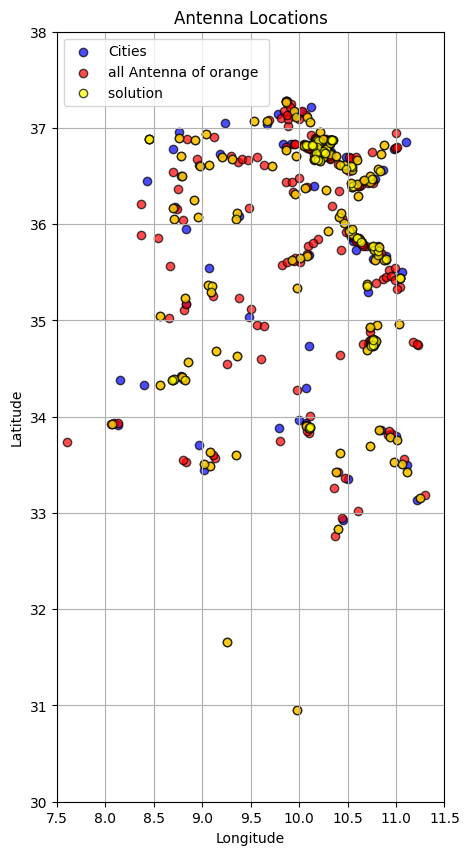

In [181]:
# Extracting 'lng' and 'lat' columns
longitudes = cities_dropped['lng']
latitudes = cities_dropped['lat']

# Extracting 'lng' and 'lat' columns
longitudes_sol = solution[::,1]
latitudes_sol = solution[::,2]

# Extracting 'lng' and 'lat' columns
longitudes_ant = antenna_cells_dict['orange']['lng']
latitudes_ant = antenna_cells_dict['orange']['lat']

# Creating a scatter plot
plt.figure(figsize=(5, 10))
plt.scatter(longitudes, latitudes, c='blue', marker='o', edgecolor='k', alpha=0.7,label='Cities')
plt.scatter(longitudes_ant, latitudes_ant, c='red', marker='o', edgecolor='k', alpha=0.7, label = 'all Antenna of orange ')
plt.scatter(longitudes_sol, latitudes_sol, c='yellow', marker='o', edgecolor='k', alpha=0.7 , label = 'solution ')
plt.title('Antenna Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.xlim(7.5,11.5)
plt.ylim(30,38)
plt.legend()
plt.show()

Now we juste go to the first data set and find the range of each solution 

In [182]:
solution_df = solution_df.rename({'city':'LAC'}, axis=1)
merged_df = pd.merge(solution_df, antenna_cells_dict['orange'], on='LAC')
merged_df = merged_df.rename({'lat_x':'lng'}, axis=1)
merged_df = merged_df.rename({'lng_x':'lat'}, axis=1)
merged_df = merged_df.drop(['lat_y','lng_y'], axis=1)
merged_df.head()

,LAC,lng,lat,CID,Range
0,414,10.276108,36.359711,55783,169.495487
1,2131,10.217972,36.955948,98249,1.000000
2,1125,10.179809,36.791755,10212,3.096436
3,302,10.785969,35.628198,32503,11.056370
4,2332,10.874179,35.627272,39435729,5.847733


we will use the same previous code to visualize the area covered buy our solution <span style="color: yellow"> ***(antenna + range)***  </span>

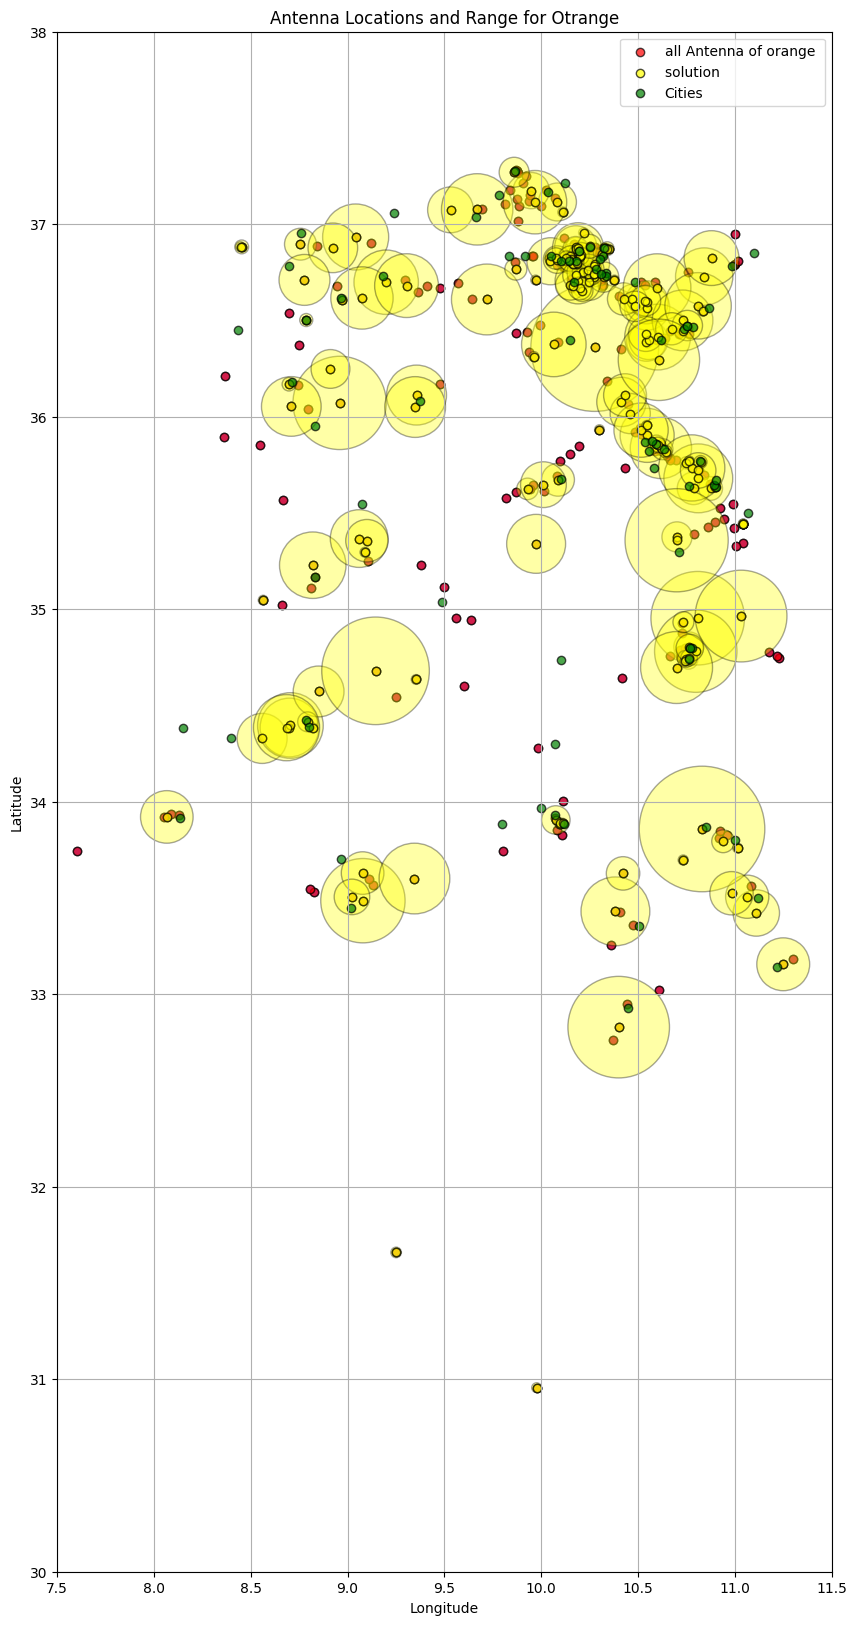

In [183]:
plt.figure(figsize=(10, 20))
#plt.scatter(merged_df['lng'], merged_df['lat'], s=merged_df['Range']*550, c='blue', alpha=0.6, edgecolor='k')
plt.scatter(antenna_cells_dict['orange']['lng'], antenna_cells_dict['orange']['lat'], c='blue', alpha=0.6, edgecolor='k')

plt.scatter(longitudes_ant, latitudes_ant, c='red', marker='o', edgecolor='k', alpha=0.7, label = 'all Antenna of orange ')
plt.scatter(longitudes_sol, latitudes_sol, c='yellow',marker='o',s=merged_df['Range']*50, edgecolor='k', alpha=0.35)
plt.scatter(longitudes_sol, latitudes_sol, c='yellow', marker='o', edgecolor='k', alpha=0.7, label = 'solution ')

plt.scatter(longitudes, latitudes, c='green', marker='o', edgecolor='k', alpha=0.7,label='Cities')

# Adding titles and labels
plt.title('Antenna Locations and Range for Otrange')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Setting x and y limits
plt.xlim(7.5, 11.5)
plt.ylim(30, 38)

# Show plot
plt.legend()
plt.show()

##  <span style="color: rgb(50,134,14) "> **3.4 Conclusion** </span>
###  

In conclusion, the simple genetic algorithm solution effectively ***reduced*** the number of antennas while still providing coverage to a significant portion of the cities. <span style="color: Orange  "> ***However, it's important to note that some cities remain uncovered due to their initial lack of coverage by the Orange network***.</span> Despite this limitation, the algorithm successfully optimized the antenna placement, leading to a more efficient network configuration. ***Overall, the solution demonstrates the potential of genetic algorithms in optimizing resource allocation and improving network efficiency.***

In addition to the observed improvements in antenna optimization, <span style="color: Orange ">***it's worth noting that the execution time of the simple genetic algorithm was considerable*** </span>. Due to the time-intensive nature of the algorithm, we have decided to explore an alternative approach in the next section. Recognizing the need for faster and potentially more efficient solutions, we will delve into the implementation of a <span style="color: cyan"> ***quantum-inspired genetic algorithm*** </span>. This approach aims to leverage quantum principles to address the optimization challenge more effectively while potentially reducing computational time.

# <span style="color: red "> **4. Quantum inspired Genetic Algorithms**  </span>

The **Quantum-Inspired Genetic Algorithm (QGA)** is an advanced optimization method that merges principles from classical genetic algorithms with ideas from quantum computing. It’s designed to solve complex problems more efficiently than traditional methods. 



##  <span style="color: rgb(50,134,14) ">**4.1 Key Concepts**</span> 

-**`Qubits`**: In quantum computing, the basic unit of information is the **qubit**. Unlike classical bits, which can be either 0 or 1, qubits can be in a state of 0, 1, or <span style="color: orange "> both simultaneously </span> due to a property called **superposition**. This allows the QGA to explore multiple solutions at once.

-**`Quantum Superposition`**: Superposition is a fundamental principle of quantum mechanics where a qubit can represent <span style="color: orange "> both 0 and 1 simultaneously </span> . This enables the algorithm to consider a broader range of potential solutions in parallel.

-**`Quantum Entanglement`**: Entanglement is another quantum phenomenon where qubits become  <span style="color: orange "> linked </span> , such that the state of one qubit directly influences the state of another, no matter the distance between them. In QGA, entanglement can be used to maintain a correlation between different parts of a solution, helping to preserve useful combinations of variables.


##  <span style="color: rgb(50,134,14) "> **4.2 How QGA Works** </span>

1. **`Initialization`**: The algorithm starts with a population of individuals, each represented by a set of qubits. The state of each qubit is described by probability amplitudes, which determine the likelihood of the qubit being measured as 0 or 1.

2. **`Quantum Rotation Gates`**: These are used to update the probability amplitudes of the qubits. Quantum rotation gates adjust the angles of the qubits to steer the search process towards better solutions based on feedback from the evaluation phase.

3. **`Measurement`**: To extract a usable solution, the qubits are measured, collapsing their superposition state to a definite binary state (0 or 1). This measurement produces a potential solution that can be evaluated using a fitness function.

4. **`Selection and Genetic Operators`**: Similar to classical genetic algorithms, the QGA uses selection processes to choose the best solutions. It also employs genetic operators like crossover and mutation, but these are applied in the quantum domain to the probability amplitudes of the qubits.

5. **`Convergence`**: Over successive generations, the population of solutions converges towards the optimal solution. The use of quantum principles allows the QGA to explore and exploit the search space more effectively, often resulting in faster convergence compared to classical methods.


##  <span style="color: rgb(50,134,14) "> **4.3 Benefits of QGA** </span>
 
The **Quantum-Inspired Genetic Algorithm** is particularly powerful because it leverages **quantum mechanics** to enhance the search capabilities of genetic algorithms. This results in:

- **Efficient Exploration**: By utilizing superposition, the QGA can explore multiple solutions simultaneously.
- **Enhanced Diversity**: Entanglement helps maintain diversity in the population, reducing the risk of premature convergence to suboptimal solutions.
- **Faster Convergence**: The quantum operations can lead to faster convergence to optimal or near-optimal solutions, making the QGA suitable for solving large and complex optimization problems.


##  <span style="color: rgb(50,134,14) "> **4.4 Globales Variables  of QGA** </span>




In this section, we describe the global variables used in the **Quantum-Inspired Genetic Algorithm (QGA)**. Each variable plays a crucial role in the algorithm's functionality.

- `popSize`: This variable represents the population size. It is initialized to `POP_SIZE + 1`.

- `genomeLength`: This variable indicates the length of the genome, i.e., the number of qubits required to represent a solution. It is set to `len(SETS) + 1`.

- `top_bottom`: Used to represent the dimensions of the qubits, this variable is initialized to 3, indicating three possible values for each qubit .

- `QuBitZero`: This variable is a numpy array representing the qubit 0 in matrix notation, i.e., `[[1], [0]]`. This means the qubit is in the "0" state.

- `QuBitOne`: This variable is a numpy array representing the qubit 1 in matrix notation, i.e., `[[0], [1]]`. This means the qubit is in the "1" state.

- `AlphaBeta`: A numpy array of size `top_bottom` that stores the probability amplitudes for the quantum states. These amplitudes are used to calculate the superposed states of the qubits.

- `fitness`: A numpy array of size `popSize` that contains the fitness values of each individual in the population. The fitness value determines the quality of a potential solution.

- `probability`: A numpy array of size `popSize` that stores the probabilities associated with each individual in the population. These probabilities are used for the selection of individuals during the reproduction process.

- `qpv`: A numpy array of dimensions `[popSize, genomeLength, top_bottom]` that represents the Quantum Probability Vectors (QPVs) for each individual in the population. Each vector describes the quantum state of a genome.

- `nqpv`: A numpy array with the same dimensions as `qpv`, used to store the new Quantum Probability Vectors after applying quantum operators (such as rotation gates).

- `chromosome`: A numpy array of dimensions `[popSize, genomeLength]` of type `int64`, representing the classical solutions (chromosomes) after measuring the qubits. Each chromosome is a potential solution to the optimization problem.

- `best_chrom`: A numpy array of size `GENERATIONS` that stores the best fitness values of each generation. This allows tracking the evolution of the best solution over generations.


In [184]:
# QGA-specific variables
popSize = POP_SIZE + 1
genomeLength = len(SETS) + 1
top_bottom = 3
QuBitZero = np.array([[1],[0]])
QuBitOne = np.array([[0],[1]])
AlphaBeta = np.empty([top_bottom])
fitness = np.empty([popSize])
probability = np.empty([popSize])
qpv = np.empty([popSize, genomeLength, top_bottom])
nqpv = np.empty([popSize, genomeLength, top_bottom])
chromosome = np.empty([popSize, genomeLength], dtype=np.int64)
best_chrom = np.empty([GENERATIONS])


##  <span style="color: rgb(50,134,14) "> **4.5 Defining the QGA function** </span>


###  <span style="color: rgb(78,79,209) "> **4.5.1 init_population_qga** </span>



The function `init_population_qga()` initializes the population for the Quantum-Inspired Genetic Algorithm (QGA). It creates the initial quantum probability vectors for each individual in the population. The function works as follows:

1. **Quantum State Preparation**: It uses the Hadamard gate (`h`) to create superpositions of qubit states.
2. **Random Rotation**: For each qubit, a random rotation angle `theta` is generated. This angle is used to create a rotation matrix (`rot`).
3. **State Transformation**: The rotation matrix is applied to the qubits' initial states (`QuBitZero` and `QuBitOne`) to calculate the new probability amplitudes (`AlphaBeta`).
4. **Probability Vector Calculation**: The new quantum probability vectors (`qpv`) are computed using the squared amplitudes of the transformed states. These vectors represent the probabilities of qubits being in state 0 or 1.

In the context of our antenna positioning problem, this function helps create a diverse initial population of potential solutions by leveraging quantum superposition, thereby enhancing the algorithm's ability to explore the solution space effectively.


In [185]:
def init_population_qga():
    r2 = math.sqrt(2.0)
    h = np.array([[1/r2, 1/r2], [1/r2, -1/r2]])
    i, j = 1, 1
    for i in range(1, popSize):
        for j in range(1, genomeLength):
            theta = np.random.uniform(0, 1) * 90
            theta = math.radians(theta)
            rot = np.array([
                [math.cos(theta), -math.sin(theta)],
                [math.sin(theta), math.cos(theta)]
            ])
            AlphaBeta[0] = rot[0,0]*(h[0][0]*QuBitZero[0]) + rot[0,1]*(h[0][1]*QuBitZero[1])
            AlphaBeta[1] = rot[1,0]*(h[1][0]*QuBitZero[0]) + rot[1,1]*(h[1][1]*QuBitZero[1])
            qpv[i, j, 0] = np.around(2*pow(AlphaBeta[0], 2), 2)
            qpv[i, j, 1] = np.around(2*pow(AlphaBeta[1], 2), 2)


###  <span style="color: rgb(78,79,209) "> **4.5.1 Measuring Quantum States in QGA** </span>



The function `measure_qga(p_alpha=0.5)` converts quantum probabilities into binary values (0s and 1s). Here's how it works:

1. **Loop through Population**: It goes through each individual (or potential solution) in the population.
2. **Loop through Genes**: For each gene (or part of the solution) of the individual:
   - **Compare Probability**: It checks if a given probability (`p_alpha`) is less than or equal to the quantum probability vector (`qpv`).
   - **Assign Value**: If the condition is true, it sets the gene to 0. Otherwise, it sets the gene to 1.

In simpler terms, this function decides whether each part of the solution should be 0 or 1 based on the quantum probabilities, helping to create a set of potential solutions for our antenna positioning problem.


In [186]:
def measure_qga(p_alpha=0.5):
    for i in range(1, popSize):
        for j in range(1, genomeLength):
            if p_alpha <= qpv[i, j, 0]:
                chromosome[i, j] = 0
            else:
                chromosome[i, j] = 1


###  <span style="color: rgb(78,79,209) "> **4.5.2 Evaluating Fitness in QGA** </span>




The function `fitness_evaluation_qga()` assesses the fitness of each potential solution in the population to determine which one is the best. Here's how it works:

1. **Loop through Population**: It iterates through each individual (or potential solution) in the population.
2. **Extract Solution**: It extracts the solution (or chromosome) from each individual.
3. **Calculate Fitness**: It calculates the fitness of the solution using another function called `evaluate_fitness()`.
4. **Find Best Solution**: After evaluating the fitness of all solutions, it identifies the index of the individual with the highest fitness.
5. **Return Index**: Finally, it returns the index of the individual with the best fitness.

In simpler terms, this function determines how good each potential solution is for solving our antenna positioning problem by evaluating their fitness, ultimately identifying the best solution among them(minimum number of Antennas).


In [187]:
def fitness_evaluation_qga():
    for i in range(1, popSize):
        solution = chromosome[i, 1:]
        fitness[i] = evaluate_fitness(solution)
    best_fitness_index = np.argmax(fitness[1:])
    return best_fitness_index


###  <span style="color: rgb(78,79,209) "> **4.5.3 Rotating  in QGA** </span>




The `rotation_qga` function applies a rotation operation inspired by principles from quantum computing. Here's how it works:

1. **Delta Theta Initialization**: It initializes the angle of rotation (`delta_theta`) to a fixed value, which is approximately 4.5 degrees in radians.
   
2. **Iterating through Population**: we  loop through each individual in the population and their respective genes (or qubits).

3. **Fitness Comparison**: we compare the fitness of each individual with the fitness of the best individual found so far (`best_index`). If the fitness of the current individual is lower than the best fitness, it performs a rotation operation on its genes.

4. **Rotation Operation**: Depending on the states of the qubits in the current individual compared to the best individual, we apply a rotation transformation to adjust the quantum probability vector (QPV) accordingly. This rotation operation is performed using a rotation matrix, which alters the quantum states of the qubits.

5. **Updating QPV**: After applying the rotation transformation, it updates the quantum probability vector (QPV) of the current individual based on the rotated values.

In quantum computing terms, this operation simulates the rotation of qubits in a quantum system to optimize the search for the best solution. By dynamically adjusting the rotation angle based on the fitness of individuals, it guides the search towards better solutions over successive generations.


In [188]:
def rotation_qga(best_index):
    delta_theta = 0.0785398163
    rot = np.empty([2, 2])
    for i in range(1, popSize):
        for j in range(1, genomeLength):
            if fitness[i] < fitness[best_index]:
                if chromosome[i, j] == 0 and chromosome[best_index, j] == 1:
                    rot = np.array([
                        [math.cos(delta_theta), -math.sin(delta_theta)],
                        [math.sin(delta_theta), math.cos(delta_theta)]
                    ])
                elif chromosome[i, j] == 1 and chromosome[best_index, j] == 0:
                    delta_theta = -delta_theta
                    rot = np.array([
                        [math.cos(delta_theta), -math.sin(delta_theta)],
                        [math.sin(delta_theta), math.cos(delta_theta)]
                    ])
                nqpv[i, j, 0] = rot[0,0]*qpv[i, j, 0] + rot[0,1]*qpv[i, j, 1]
                nqpv[i, j, 1] = rot[1,0]*qpv[i, j, 0] + rot[1,1]*qpv[i, j, 1]
                qpv[i, j, 0] = round(nqpv[i, j, 0], 2)
                qpv[i, j, 1] = round(1 - nqpv[i, j, 0], 2)


###  <span style="color: rgb(78,79,209) "> **4.5.3 Quantum-Inspired Mutation Operation** </span>


### 

The `mutation_qga` function implements a mutation operation inspired by principles from quantum computing. Here's how it works:

1. **Population Mutation Rate**: we first determine if each individual in the population undergoes mutation based on a specified population mutation rate (`pop_mutation_rate`). If the random probability falls within this rate, the individual is considered for mutation.

2. **Gene Mutation Rate**: For each selected individual, it iterates through its genes (or qubits) and determines if each gene undergoes mutation based on a specified gene mutation rate (`mutation_rate`). If the random probability falls within this rate, the gene's quantum state is swapped.

3. **Mutation Process**: 
   - If a gene is selected for mutation, the quantum probability vector (QPV) of that gene is updated by swapping the probabilities of its quantum states.
   - If a gene is not selected for mutation, its quantum probability vector remains unchanged.

4. **Updating QPV**: After completing the mutation process for all individuals and genes, the quantum probability vectors (QPVs) are updated with the new values obtained from the mutation process.

In quantum computing terms, this operation simulates the random mutation of qubits in a quantum system. By adjusting the probabilities of individual genes based on the specified mutation rates, it introduces diversity into the population and facilitates exploration of the solution space.


In [189]:
def mutation_qga(pop_mutation_rate=0.01, mutation_rate=0.001):
    for i in range(1, popSize):
        if random.random() <= pop_mutation_rate:
            for j in range(1, genomeLength):
                if random.random() <= mutation_rate:
                    nqpv[i, j, 0] = qpv[i, j, 1]
                    nqpv[i, j, 1] = qpv[i, j, 0]
                else:
                    nqpv[i, j, 0] = qpv[i, j, 0]
                    nqpv[i, j, 1] = qpv[i, j, 1]
        else:
            for j in range(1, genomeLength):
                nqpv[i, j, 0] = qpv[i, j, 0]
                nqpv[i, j, 1] = qpv[i, j, 1]
    for i in range(1, popSize):
        for j in range(1, genomeLength):
            qpv[i, j, 0] = nqpv[i, j, 0]
            qpv[i, j, 1] = nqpv[i, j, 1]


##  <span style="color: rgb(50,134,14) "> **4.6 Resolving the antenna problem** </span>


###  <span style="color: rgb(78,79,209) "> **4.6.1 Initialization** </span>




   - The `init_population_qga` function initializes the population of quantum individuals (Qubits) with random values and sets up the necessary variables for the QGA.
   - The `measure_qga` function determines the quantum states (0 or 1) of each qubit in the population based on a predetermined threshold probability (0.5 in this case).
   - The `fitness_evaluation_qga` function evaluates the fitness of each individual in the population based on its quantum state and returns the index of the individual with the best fitness.



###  <span style="color: rgb(78,79,209) "> **4.6.2 Evolutionary Process** </span>
   - The QGA proceeds through multiple generations (controlled by the `GENERATIONS` variable).
   - In each generation, the `rotation_qga` function applies rotation operations to the qubits based on their fitness relative to the best individual.
   - The `mutation_qga` function introduces random mutations to the qubits to maintain diversity in the population.
   - After each rotation and mutation operation, the quantum states of the individuals are measured again using the `measure_qga` function, and their fitness is evaluated.
   - The best individual from each generation is selected based on its fitness.

In [190]:
def qga_antenna_positioning():
    generation = 0
    init_population_qga()
    measure_qga(0.5)
    best_index = fitness_evaluation_qga()
    
    for generation in range(GENERATIONS):
        rotation_qga(best_index)
        mutation_qga()
        measure_qga(0.5)
        best_index = fitness_evaluation_qga()
    
    best_solution = chromosome[best_index, 1:]
    return best_solution


###  <span style="color: rgb(78,79,209) "> **4.6.2 Result extraction** </span>
   - After all generations are completed, the best solution obtained from the QGA is extracted from the population.
   - The indices of the selected subsets (antenna positions) are determined based on the best solution.
   - The latitude and longitude coordinates of the selected antenna positions are extracted and plotted on a scatter plot along with the existing antenna positions and city locations to visualize the optimal antenna locations for covering the entire Tunisia.

In [191]:
import time

start_time = time.time()

# Run the QGA for antenna positioning
best_solution_qga = qga_antenna_positioning()
indices_qga = [index for index in range(len(SETS)) if best_solution_qga[index]]







# Create the Excel file with the best solution found by QGA
workbook = openpyxl.Workbook()
worksheet = workbook.active
worksheet['A1'] = 'city'
worksheet['B1'] = 'lat'
worksheet['C1'] = 'lng'

for index in indices_qga:
    worksheet.append([potential_sites[index][0], potential_sites[index][1], potential_sites[index][2]])

workbook.save('solution_qga.xlsx')
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


Execution time: 19.924399614334106 seconds


##  <span style="color: rgb(50,134,14) "> **4.6 Visualization of the results** </span>


In [192]:
#read the file
solution_qga_df= pd.read_excel('solution_qga.xlsx')
solution_qga=solution_qga_df.values
# create a list to store all the GeoDataFrames
regions = []
solution_qga

print ("le nombre d'antenne optimale a installer pour couvrer la totalite de la tunisie " , len(solution_qga))

le nombre d'antenne optimale a installer pour couvrer la totalite de la tunisie  177


The next code segment is responsible for visualizing the antenna locations and the selected solution on a scatter plot. 

Here's how it works:

1. **Data Extraction**: we  first extracts the longitude and latitude columns from the dataset representing the cities and potential antenna positions, as well as from the solution obtained.

2. **Scatter Plot Creation**: Using Matplotlib, a scatter plot is created with the <span style="color: blue"> ***cities*** </span> represented in blue, the <span style="color: red"> ***potential antenna locations*** </span> in red, and the <span style="color: yellow">***selected solution***</span> in yellow. Each point on the plot represents a location, with the x-axis indicating longitude and the y-axis indicating latitude.

3. **Plot Customization**: The plot is further customized by adding titles, axis labels, and gridlines. Additionally, the x-axis and y-axis limits are set to focus the plot on the relevant geographical area.

4. **Visualization**: Finally, the plot is displayed to visualize the distribution of cities, potential antenna locations, and the selected solution in the specified geographical region.

This visualization aids in understanding the spatial distribution of the cities and antenna positions, as well as the effectiveness of the selected solution in covering the target areas.

In [193]:
solution_qga_ren = solution_qga_df.rename({'city':'LAC'}, axis=1)
merged_qga = pd.merge(solution_qga_ren, antenna_cells_dict['orange'], on='LAC')
merged_qga = merged_qga.rename({'lat_x':'lng'}, axis=1)
merged_qga = merged_qga.rename({'lng_x':'lat'}, axis=1)
merged_qga = merged_qga.drop(['lat_y','lng_y'], axis=1)
merged_qga.head()

,LAC,lng,lat,CID,Range
0,414,10.276108,36.359711,55783,169.495487
1,1416,9.132751,33.569024,45088,51.262533
2,1125,10.179809,36.791755,10212,3.096436
3,302,10.785969,35.628198,32503,11.056370
4,322,10.923505,35.524061,33193,4.888178


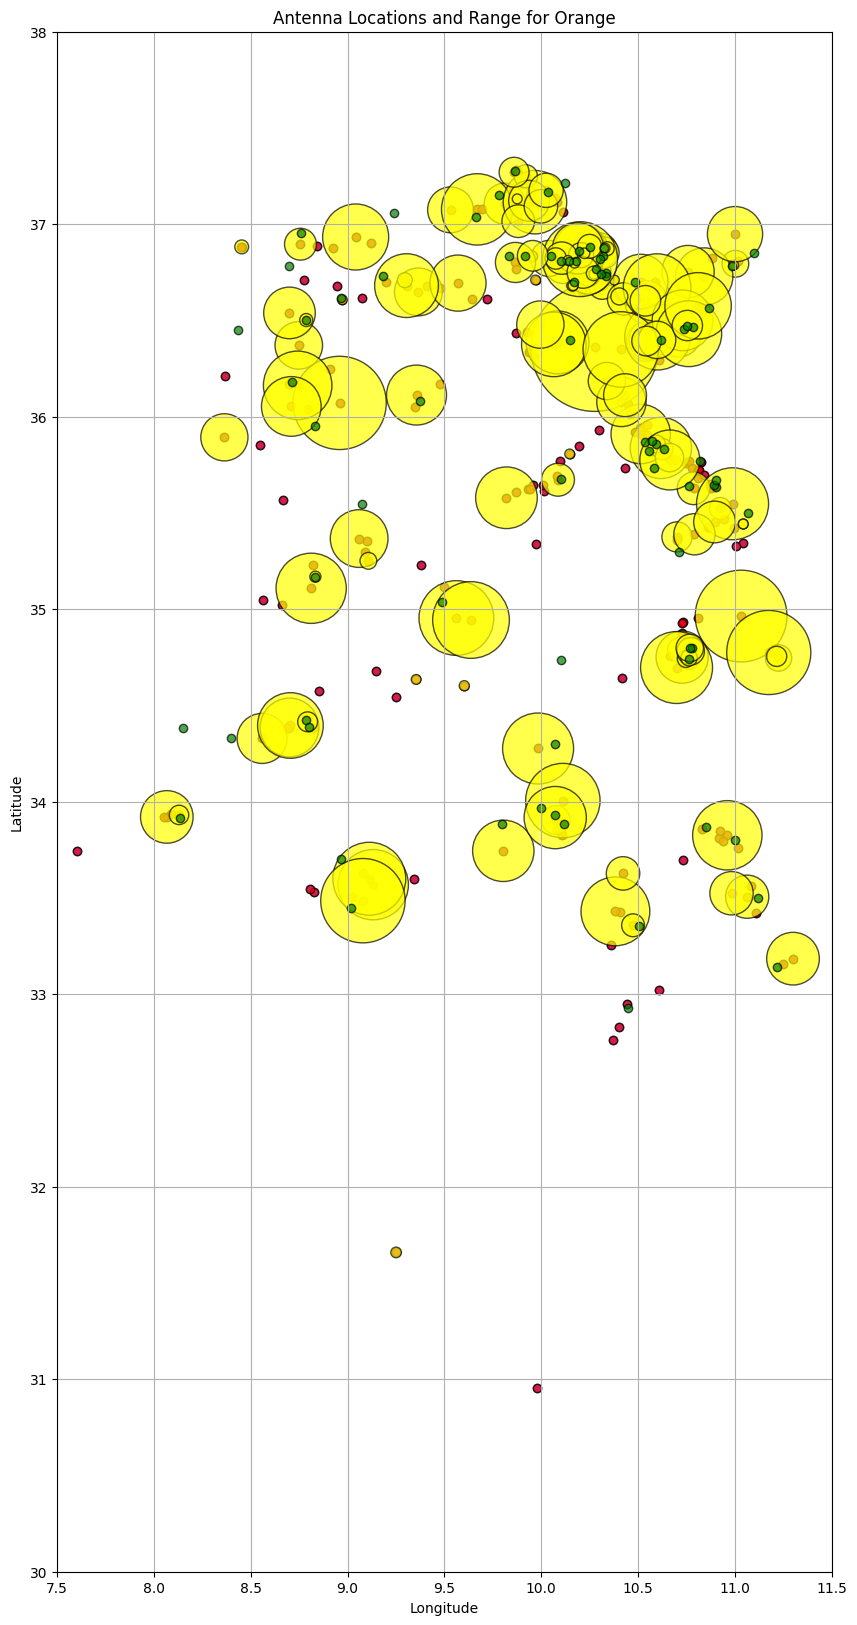

In [194]:
longitudes_sol = merged_qga.lng.values
latitudes_sol = merged_qga.lat.values


plt.figure(figsize=(10, 20))
#plt.scatter(merged_df['lng'], merged_df['lat'], s=merged_df['Range']*550, c='blue', alpha=0.6, edgecolor='k')
plt.scatter(antenna_cells_dict['orange']['lng'], antenna_cells_dict['orange']['lat'], c='blue', alpha=0.6, edgecolor='k')

plt.scatter(longitudes_ant, latitudes_ant, c='red', marker='o', edgecolor='k', alpha=0.7)
plt.scatter(longitudes_sol, latitudes_sol, c='yellow', marker='o', s = merged_qga['Range'].values*50, edgecolor='k', alpha=0.7)
plt.scatter(longitudes, latitudes, c='green', marker='o', edgecolor='k', alpha=0.7)

# Adding titles and labels
plt.title('Antenna Locations and Range for Orange')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Setting x and y limits
plt.xlim(7.5, 11.5)
plt.ylim(30, 38)

# Show plot
plt.show()

# <span style="color: red "> **4. Conclusion**  </span> 
Through our experimentation, we've discovered that the Quantum Genetic Algorithm (QGA) offers a substantial improvement over the classic Genetic Algorithm in terms of both speed and effectiveness. The QGA efficiently navigates the search space, converging to optimal solutions more rapidly compared to its traditional counterpart. This enhanced efficiency makes the QGA a promising approach for solving complex optimization problems like antenna positioning. By harnessing the principles of quantum mechanics, the QGA demonstrates its capability to deliver superior results, showcasing its potential for real-world applications where time and precision are critical factors.